Analisis de consumo de Netflix con python

Importacion y carga de datos

In [42]:


# Montar Google Drive (opcional si el archivo está ahí)
from google.colab import files

In [43]:
import pandas as pd


# Leer el archivo CSV

df = pd.read_csv("/content/peliculas_series.csv")  # Ruta correcta


# Mostrar las primeras filas
df.head()

,Fecha,Título,Tipo,Año,Mes,Día_mes,Día_semana
0,2023-02-01,Shawshank Redemption,Película,2023,April,1,Monday
1,2024-11-14,Forrest Gump,Película,2024,July,14,Saturday
2,2023-11-26,Fight Club,Película,2023,July,26,Sunday
3,2022-09-05,The Dark Knight,Película,2022,June,5,Saturday
4,2022-09-26,The Office,Serie,2022,January,26,Thursday


In [44]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Fecha       500 non-null    object
 1   Título      500 non-null    object
 2   Tipo        500 non-null    object
 3   Año         500 non-null    int64 
 4   Mes         500 non-null    object
 5   Día_mes     500 non-null    int64 
 6   Día_semana  500 non-null    object
dtypes: int64(2), object(5)
memory usage: 27.5+ KB


Creacion de variables derivadas de la fecha


In [45]:
df['Fecha'] = pd.to_datetime(df['Fecha'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Fecha       500 non-null    datetime64[ns]
 1   Título      500 non-null    object        
 2   Tipo        500 non-null    object        
 3   Año         500 non-null    int64         
 4   Mes         500 non-null    object        
 5   Día_mes     500 non-null    int64         
 6   Día_semana  500 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 27.5+ KB


Colocar la fecha como index del dataframe

In [46]:
df.set_index('Fecha',inplace=True)
df

,Título,Tipo,Año,Mes,Día_mes,Día_semana
Fecha,,,,,,
2023-02-01,Shawshank Redemption,Película,2023,April,1,Monday
2024-11-14,Forrest Gump,Película,2024,July,14,Saturday
2023-11-26,Fight Club,Película,2023,July,26,Sunday
2022-09-05,The Dark Knight,Película,2022,June,5,Saturday
2022-09-26,The Office,Serie,2022,January,26,Thursday
...,...,...,...,...,...,...
2025-05-11,Pulp Fiction,Película,2025,November,11,Monday
2022-04-26,The Office,Serie,2022,January,26,Wednesday
2022-07-22,Inception,Película,2022,July,22,Sunday


Funcion para tomar la fecha y hacer de ellas mas variables

In [93]:
def atributos_fechas(data):
  data['Año'] = data.index.year
  data['Mes'] = data.index.month_name()

  data['Dia_semana'] = data.index.day_name()

  return data


In [95]:
atributos_fechas(df)

,Título,Tipo,Año,Mes,Día_mes,Día_semana,Dia_mes,Dia_semana
Fecha,,,,,,,,
2023-02-01,Shawshank Redemption,Película,2023,February,1,Monday,1,Wednesday
2024-11-14,Forrest Gump,Película,2024,November,14,Saturday,14,Thursday
2023-11-26,Fight Club,Película,2023,November,26,Sunday,26,Sunday
2022-09-05,The Dark Knight,Película,2022,September,5,Saturday,5,Monday
2022-09-26,The Office,Serie,2022,September,26,Thursday,26,Monday
...,...,...,...,...,...,...,...,...
2025-05-11,Pulp Fiction,Película,2025,May,11,Monday,11,Sunday
2022-04-26,The Office,Serie,2022,April,26,Wednesday,26,Tuesday
2022-07-22,Inception,Película,2022,July,22,Sunday,22,Friday


# **Analisis**

Hace cuanto esta contratado Netflix

In [49]:
from datetime import datetime

fecha_hoy = datetime.today().date()

primer_dia = df.index.min().date()

tiempo_contrato = fecha_hoy - primer_dia

print(f'La contratación fue en {primer_dia} y hasta la fecha es {tiempo_contrato.days}')


La contratación fue en 2022-01-03 y hasta la fecha es 1158


Cuanto he gastado en Netflix hasta ahora

In [50]:
#Si el costo mensual es de 12 euros
coste_mensual = 12

gasto = tiempo_contrato.days / 30 * coste_mensual

print(f'El gasto mensual es de 12 euros , por lo que se ha gastado hasta la fecha {gasto} euros')


El gasto mensual es de 12 euros , por lo que se ha gastado hasta la fecha 463.20000000000005 euros


Otra forma de hacerlo mas exacta

In [51]:
diferencia_años = fecha_hoy.year - primer_dia.year
diferencia_años
diferencia_mes = fecha_hoy.month - primer_dia.month
diferencia_real = diferencia_años * 12 + diferencia_mes

gasto = diferencia_real * 12
print(f'El gasto mensual es de 12 euros , por lo que se ha gastado hasta la fecha {gasto} euros, debido a que han transcurrido {diferencia_real} meses')


El gasto mensual es de 12 euros , por lo que se ha gastado hasta la fecha 456 euros, debido a que han transcurrido 38 meses


Cuanto tiempo de mi vida le dedico cada año a Netflix

In [52]:
#Como no tengo la duracion de cada uno de las peliculas y series se lleva un aproximado,
#tiempo promedio de una pelicula 45 minutos y de una serie 100 min

tiempo_promedio_peliculas = 45
tiempo_promedio_series = 100

#Agrupo todas las peliculas vista
df_peliculas = df[df['Tipo'] == 'Película']

#Agrupo las peliculas vistas por años
df_peliculas_años = df_peliculas.groupby('Año').size().reset_index(name='Peliculas_vistas')


df_peliculas_años['Tiempo_consumido'] = df_peliculas_años['Peliculas_vistas'] * tiempo_promedio_peliculas



#Agrupo el df original por series
df_series= df[df['Tipo'] == 'Serie']

df_series_años = df_series.groupby('Año').size().to_frame(name='Cantidad_series_vistas')
df_series_años = df_series_años.rename(columns={0:'Cantidad_series_vistas'})
df_series_años['Tiempo_consumido'] = df_series_años['Cantidad_series_vistas'] * tiempo_promedio_series
df_series_años


,Cantidad_series_vistas,Tiempo_consumido
Año,,
2022,58,5800
2023,69,6900
2024,71,7100
2025,54,5400


Cual es la pelicula mas vista por años, y la mas vista entre todos los años

In [74]:
#La pelicula mas vista por años

df_peliculas = df[df['Tipo'] == 'Película']


# Contar cuántas veces se ha visto cada película por año
peliculas_vistas = df_peliculas.groupby(['Año','Título']).size().to_frame(name='Cantidad_vista').reset_index()

max_vista = peliculas_vistas[peliculas_vistas['Año'] == 2022]['Cantidad_vista'].max()
peliculas_mas_vistas_22 = peliculas_vistas[(peliculas_vistas['Año'] == 2022) & (peliculas_vistas['Cantidad_vista'] == max_vista)]
print(f'La pelicula mas vista del 2022 es')
print(peliculas_mas_vistas_22)

max_vista_2023 = peliculas_vistas[peliculas_vistas['Año'] == 2023]['Cantidad_vista'].max()
peliculas_mas_vistas_23 = peliculas_vistas[(peliculas_vistas['Año'] == 2023) & (peliculas_vistas['Cantidad_vista'] == max_vista_2023)]
print(f'La pelicula mas vista del 2023 es')
print(peliculas_mas_vistas_23)

max_vista_2024 = peliculas_vistas[peliculas_vistas['Año'] == 2024]['Cantidad_vista'].max()
peliculas_mas_vistas_24 = peliculas_vistas[(peliculas_vistas['Año'] == 2024) & (peliculas_vistas['Cantidad_vista'] == max_vista_2024)]
print(f'La pelicula mas vista del 2024 es')
print(peliculas_mas_vistas_24)

max_vista_2025 = peliculas_vistas[peliculas_vistas['Año'] == 2025]['Cantidad_vista'].max()
peliculas_mas_vistas_25 = peliculas_vistas[(peliculas_vistas['Año'] == 2025) & (peliculas_vistas['Cantidad_vista'] == max_vista_2025)]
print(f'La pelicula mas vista del 2025 es')
print(peliculas_mas_vistas_25)


#Otra forma de obener el resultado

# Contar cuántas veces se ha visto cada película por año
peliculas_vistas = df_peliculas.groupby(['Año', 'Título']).size().reset_index(name='Veces_vista')

# Obtener la película más vista por año
pelicula_mas_vista_por_año = peliculas_vistas.loc[peliculas_vistas.groupby('Año')['Veces_vista'].idxmax()]
pelicula_mas_vista_por_año



La pelicula mas vista del 2022 es
    Año     Título  Cantidad_vista
2  2022  Inception              12
La pelicula mas vista del 2023 es
     Año      Título  Cantidad_vista
10  2023  Fight Club              10
La pelicula mas vista del 2024 es
     Año                Título  Cantidad_vista
21  2024          Forrest Gump              12
25  2024  Shawshank Redemption              12
La pelicula mas vista del 2025 es
     Año      Título  Cantidad_vista
39  2025  The Matrix               8


,Año,Título,Veces_vista
2,2022,Inception,12
10,2023,Fight Club,10
21,2024,Forrest Gump,12
39,2025,The Matrix,8


Que dia de la semana suelo ver mas series y mas peliculas respectivamente

<Axes: xlabel='Dia_semana'>

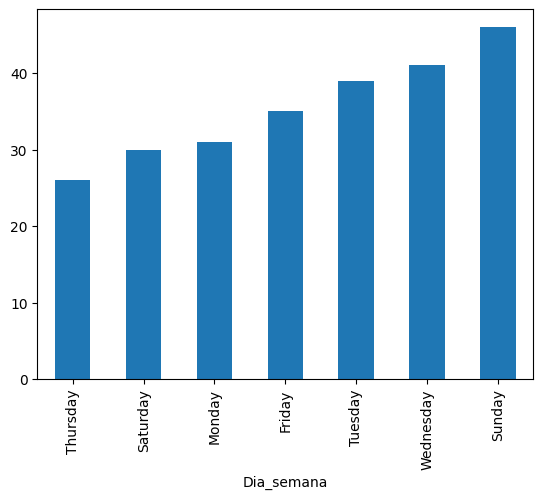

In [81]:
#Filtro por pelicula
df_peliculas = df[df['Tipo'] == 'Película']
df_peliculas_semana = df_peliculas['Dia_semana'].value_counts(ascending=True)
df_peliculas_semana.plot(kind='bar')


<Axes: xlabel='Dia_semana'>

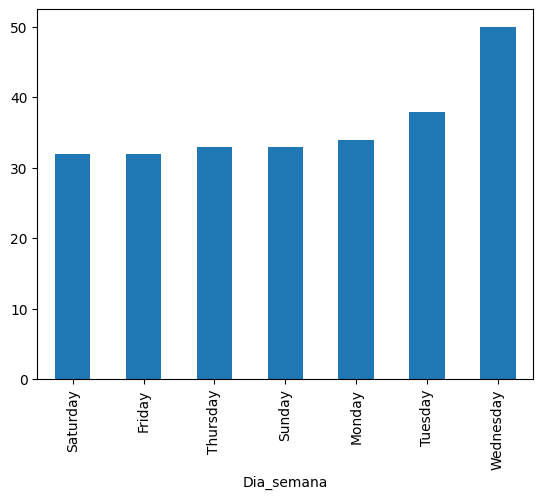

In [90]:
#Filtro por series
df_series = df[df['Tipo'] == 'Serie']

df_series_semana = df_series['Dia_semana'].value_counts(ascending=True)
df_peliculas_semana
df_series_semana.plot(kind='bar')

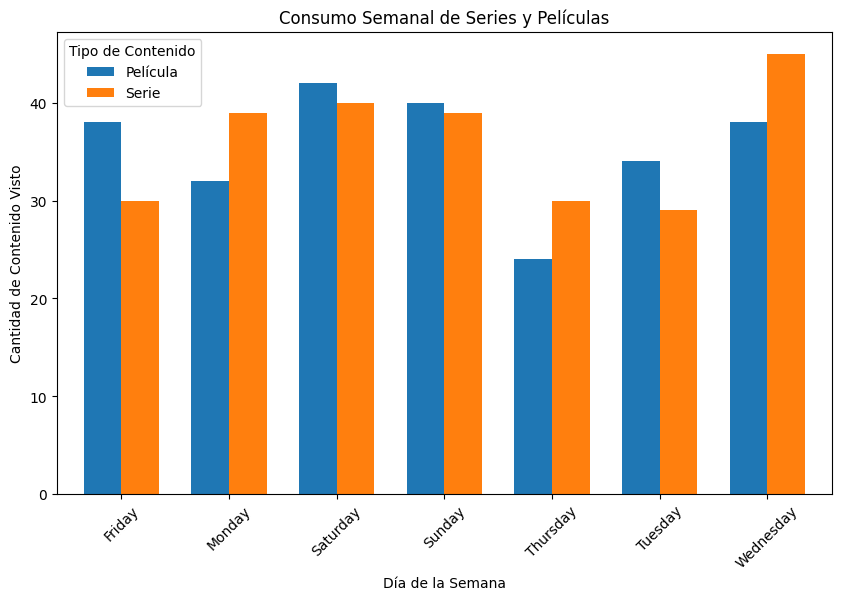

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
# Agrupar por día de la semana y tipo de contenido (Película o Serie)
df_semanal = df.groupby(['Día_semana', 'Tipo']).size().unstack()

# Crear el gráfico de barras
df_semanal.plot(kind='bar', figsize=(10,6), width=0.7)

# Personalizar etiquetas y título
plt.xlabel("Día de la Semana")
plt.ylabel("Cantidad de Contenido Visto")
plt.title("Consumo Semanal de Series y Películas")
plt.xticks(rotation=45)  # Rotar etiquetas del eje X
plt.legend(title="Tipo de Contenido")

# Mostrar el gráfico
plt.show()

Para el año 2022, el consumo total como se comporto mensual

          Mes  vista_mensual
0       April              8
1      August              6
2    December             12
3    February             19
4     January             10
5        July             11
6        June             11
7       March             10
8         May              6
9    November             11
10    October             14
11  September             11
<class 'pandas.core.frame.DataFrame'>


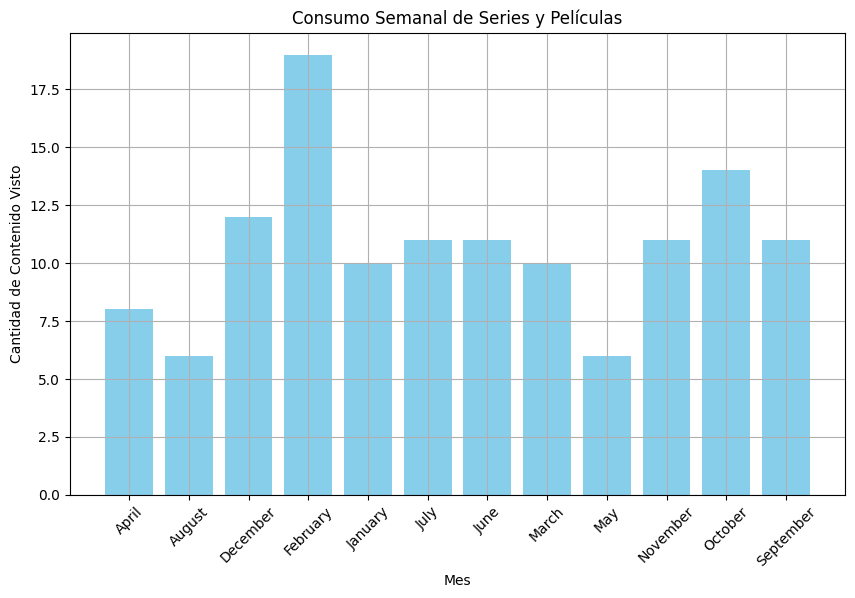

In [124]:
peliculas_vistas_22 = df[df['Año'] == 2022]


peliculas_vistas_mensual_22 = peliculas_vistas_22.groupby(['Mes']).size().reset_index(name='vista_mensual')
print(peliculas_vistas_mensual_22)
print(type(peliculas_vistas_mensual_22))

plt.figure(figsize=(10,6))
plt.bar(peliculas_vistas_mensual_22["Mes"], peliculas_vistas_mensual_22["vista_mensual"], color="skyblue")


# Personalizar etiquetas y título
plt.xlabel("Mes")
plt.ylabel("Cantidad de Contenido Visto")
plt.title("Consumo Semanal de Series y Películas")
plt.xticks(rotation=45)  # Rotar etiquetas del eje X
plt.grid(True)  # Desactiva la cuadrícula

# Mostrar el gráfico
plt.show()